<a href="https://colab.research.google.com/github/orangeduice/mlDrarn/blob/main/ClusteringExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jdcal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/Resources/')

Mounted at /Resources/


In [7]:
!cp /Resources/MyDrive/Colab\ Notebooks/mlDarn.py /content

In [8]:
import pandas as pd
import numpy as np
import os
import jdcal
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import math
import matplotlib.colors as colors
from copy import copy, deepcopy

import mlDarn

In [9]:
DIREC = "/Resources/MyDrive/Masters/processed/"
YEAR = 1996

In [11]:
allData = mlDarn.loadYear(YEAR, DIREC)

Loading: 19969processedRCC.csv Dimensions:
Loading: 19961processedRCC.csv Dimensions:
Loading: 19962processedRCC.csv Dimensions:
Loading: 19963processedRCC.csv Dimensions:
Loading: 19964processedRCC.csv Dimensions:
Loading: 19965processedRCC.csv Dimensions:
Loading: 19968processedRCC.csv Dimensions:


In [12]:
HTR_PIFs = [
            [1996,1,18,0,0,0],
            [1996,1,19,0,0,0],
            [1996,1,25,0,0,0],
            [1996,1,26,0,0,0],
            [1996,1,27,0,0,0],
            [1996,4, 3,0,0,0],
            [1996,4, 4,0,0,0],
            [1996,4, 5,0,0,0],
            [1996,4, 7,0,0,0],
            [1996,4, 8,0,0,0],
            [1996,5,12,0,0,0],
            [1996,5,14,0,0,0],
            [1996,8, 2,0,0,0],
            [1996,8, 3,0,0,0],
            [1996,8, 4,0,0,0],
            [1996,8, 6,0,0,0],
            [1996,9,14,0,0,0],
            [1996,9,24,0,0,0],
            [1996,9,25,0,0,0]
           ]

In [13]:
training_data = mlDarn.selectTimeFrame(allData,[1996,1,18,0,0,0], [1996,1,19,0,0,0])

BEAM = 9
time_adj = mlDarn.extendedJD(YEAR,0,0,0,0,0)

x_train = training_data.loc[:,["jd","slist","v","p_l","w_l","bmnum"]]

X_train = deepcopy(x_train .to_numpy())
temp = np.full(np.shape(X_train)[0], time_adj)
X_train[:, 0] -= temp
X_train[:, 0] = X_train[:, 0]/X_train[:, 0].max()

In [14]:
testing_data = mlDarn.selectTimeFrame(allData,[1996,8, 4,0,0,0], [1996,8, 5,0,0,0])

BEAM = 9
time_adj = mlDarn.extendedJD(YEAR,0,0,0,0,0)

x_test = testing_data.loc[:,["jd","slist","v","p_l","w_l","bmnum"]]

X_test = deepcopy(x_test .to_numpy())
temp = np.full(np.shape(X_test)[0], time_adj)
X_test[:, 0] -= temp
X_test[:, 0] = X_test[:, 0]/X_test[:, 0].max()

In [17]:
from sklearn.mixture import GaussianMixture
GMix = GaussianMixture(n_components=5, n_init=4,random_state=42).fit(X_train)

x_test["class_gmm"] = GMix.predict(X_test)
x_test["bmnum"] =  testing_data["bmnum"]
x_test["slist"] =  testing_data["slist"]

x_train["class_gmm"] = GMix.predict(X_train)
x_train["bmnum"] =  training_data["bmnum"]
x_train["slist"] =  training_data["slist"]

|| 1996/1/18 8:0:0  to  1996/1/18 13:0:0 || beam 9 ||  


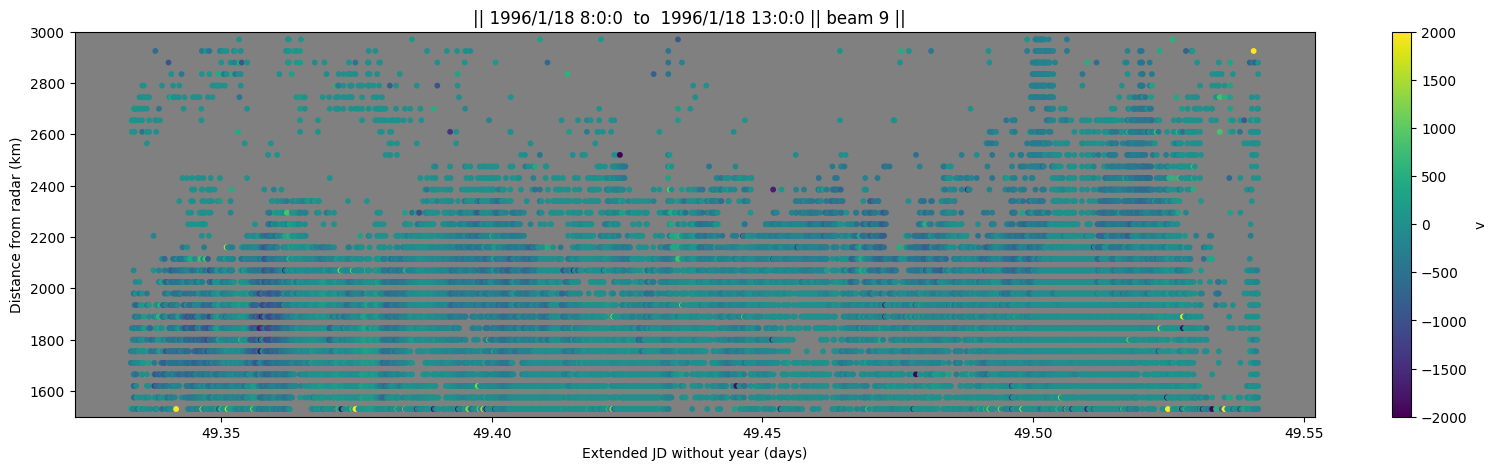

In [37]:
mlDarn.plot_timeframe( x_train, beam = 9,  param = "v",y_range = (1500,3000),size=10,start_time=[1996,1,18,8,0,0],end_time= [1996,1,18,13,0,0])

|| 1996/1/18 0:1:58  to  1996/1/19 0:0:0 || beam 9 || gmm clustering model using RR coords. and 5 clusters ||


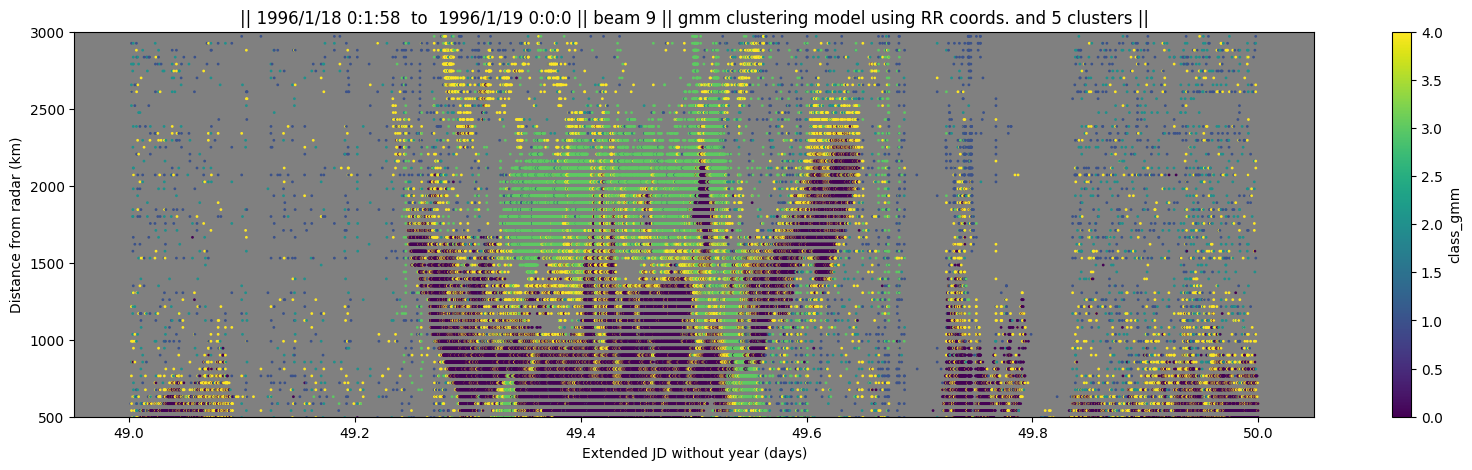

In [27]:
mlDarn.plot_timeframe( x_train, beam = 9,  param = "class_gmm",str_title = "gmm clustering model using RR coords. and 5 clusters ||",y_range = (500,3000))

|| 1996/8/4 0:0:6  to  1996/8/4 23:59:49 || beam 6 || gmm clustering model using RR coords. and 5 clusters ||


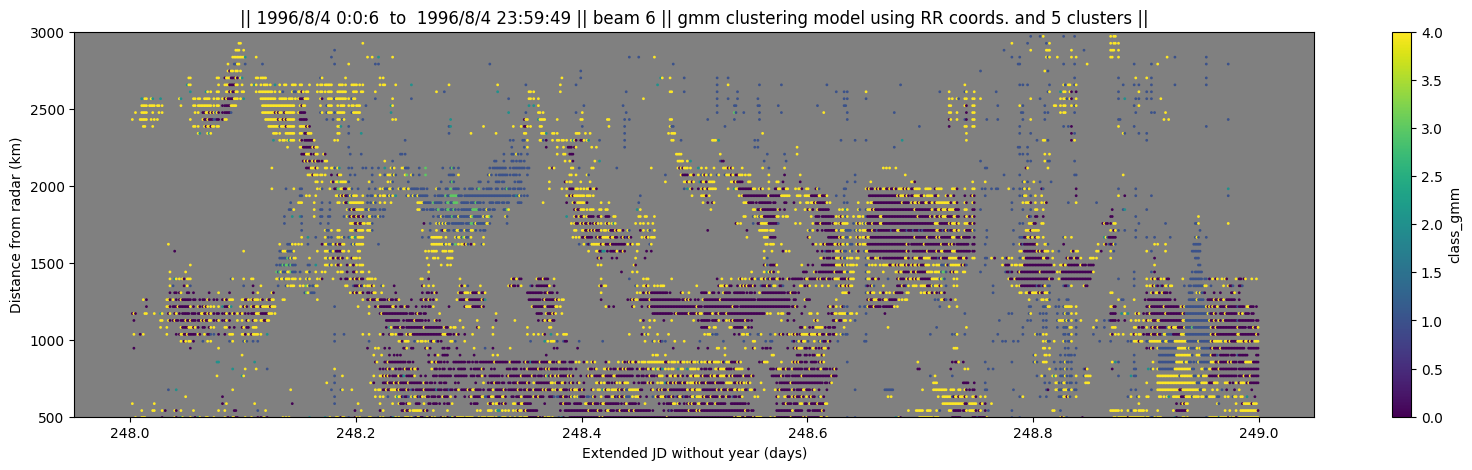

In [28]:
mlDarn.plot_timeframe( x_test, beam = 6,  param = "class_gmm",str_title = "gmm clustering model using RR coords. and 5 clusters ||",y_range = (500,3000))

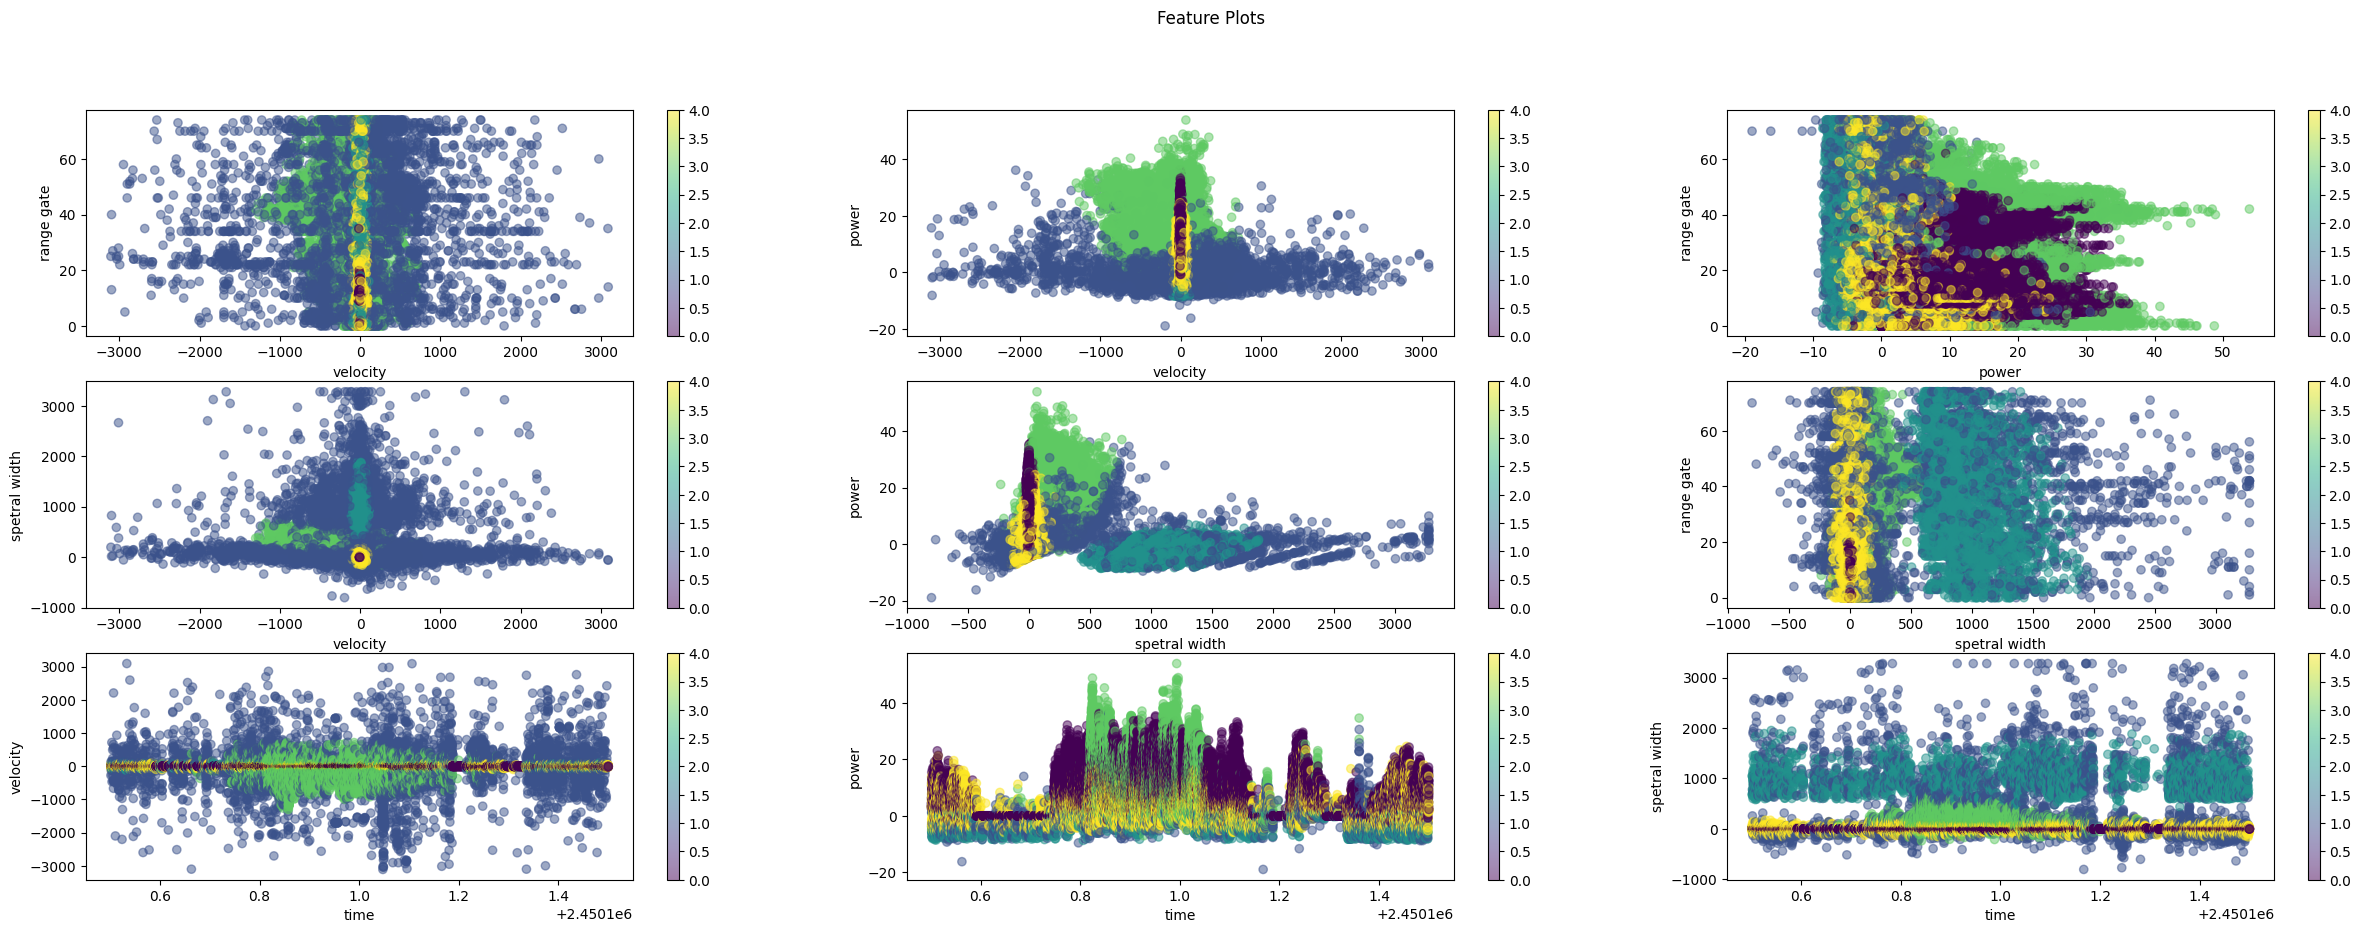

In [24]:
mlDarn.feature_plots(x_train, beam = 9, param = "class_gmm")

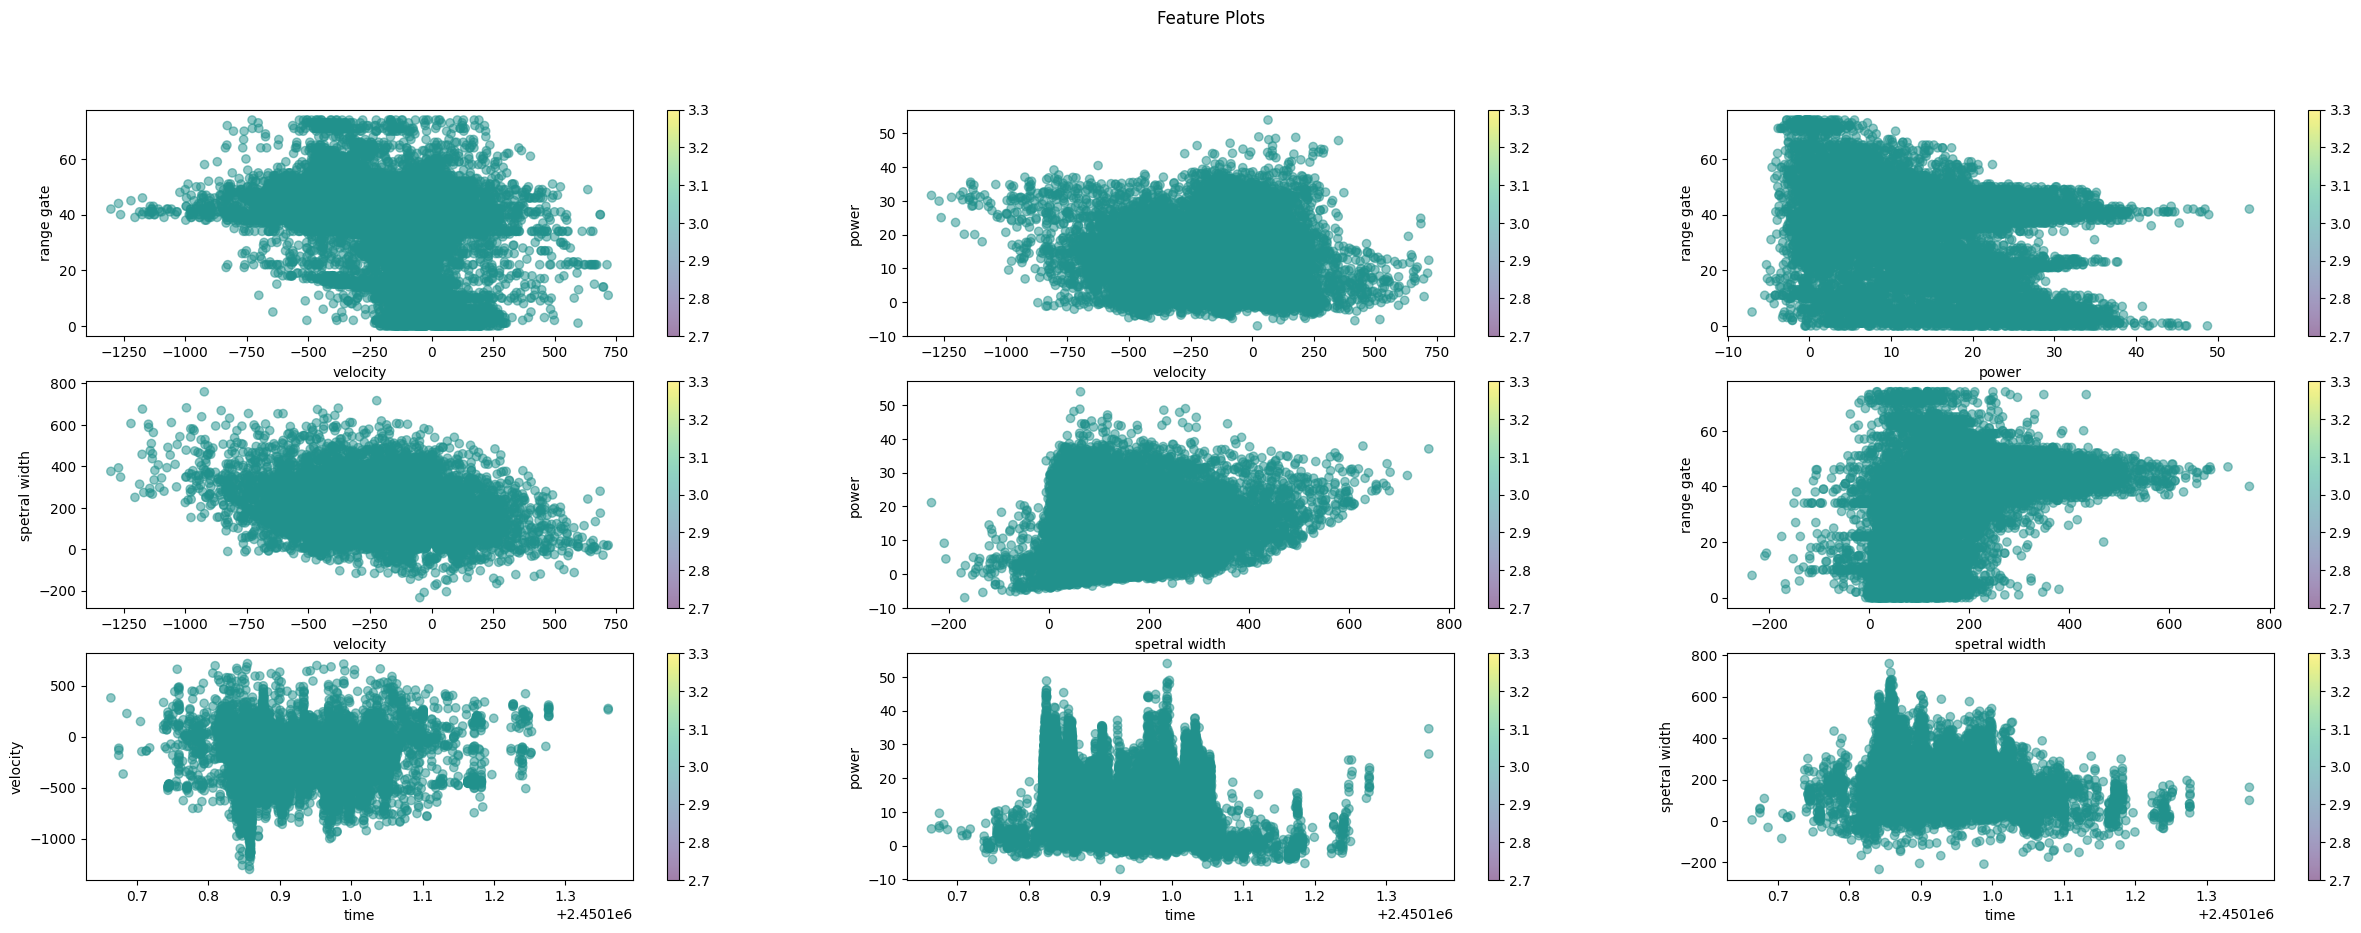

In [29]:
mlDarn.feature_plots(x_train, beam = 9, param = "class_gmm",cluster = 3)